In [1]:
pip install missingno



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: /opt/anaconda3/envs/myenv/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import missingno as msno
%matplotlib inline

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

disney_titles = pd.read_csv("titles.csv")
titles=pd.DataFrame(disney_titles)
titles.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,tm89464,Miracle on 34th Street,MOVIE,"Kris Kringle, seemingly the embodiment of Sant...",1947,G,96,"['family', 'comedy', 'drama']",['US'],NaN,tt0039628,7.9,50969.0,23.515,7.388
1,tm61729,The Adventures of Ichabod and Mr. Toad,MOVIE,The Wind in the Willows: Concise version of Ke...,1950,G,68,"['horror', 'fantasy', 'animation', 'family', '...",['US'],NaN,tt0041094,6.9,16502.0,16.194,6.500
2,tm61052,Cinderella,MOVIE,Cinderella has faith her dreams of a better li...,1950,G,74,"['fantasy', 'animation', 'family', 'romance']",['US'],NaN,tt0042332,7.3,164292.0,93.547,7.035
3,tm87946,Dumbo,MOVIE,Dumbo is a baby elephant born with over-sized ...,1941,G,64,"['animation', 'drama', 'family', 'fantasy']",['US'],NaN,tt0033563,7.2,135045.0,54.265,6.999
4,tm74391,Fantasia,MOVIE,Walt Disney's timeless masterpiece is an extra...,1941,G,119,"['animation', 'family', 'fantasy', 'music']",['US'],NaN,tt0032455,7.7,98764.0,43.609,7.382


In [3]:
# Get the shape of the dataset rows,columns
titles.shape

(1854, 15)

In [4]:
# Get summary statistics of the DataFrame
titles.describe()

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,1854.000000,1854.000000,540.000000,1339.000000,1.328000e+03,1839.000000,1708.000000
mean,2006.193635,59.206580,2.618519,6.620687,6.961624e+04,25.745671,6.817494
std,20.629561,38.566305,3.268281,1.066208,1.846213e+05,79.389568,1.165990
min,1928.000000,1.000000,1.000000,1.600000,5.000000e+00,0.600000,2.000000
25%,2002.000000,24.000000,1.000000,5.950000,3.267500e+02,2.998500,6.217500
50%,2014.000000,48.000000,2.000000,6.700000,3.228000e+03,9.148000,6.873000
75%,2020.000000,91.000000,3.000000,7.400000,3.273050e+04,23.152500,7.500000
max,2023.000000,182.000000,36.000000,9.500000,1.403757e+06,2159.377000,10.000000


In [5]:
titles.dtypes

id                       object
title                    object
type                     object
description              object
release_year              int64
age_certification        object
runtime                   int64
genres                   object
production_countries     object
seasons                 float64
imdb_id                  object
imdb_score              float64
imdb_votes              float64
tmdb_popularity         float64
tmdb_score              float64
dtype: object

In [6]:
null = titles.isnull().sum()
print(null.count)

<bound method Series.count of id                         0
title                      0
type                       0
description                9
release_year               0
age_certification        451
runtime                    0
genres                     0
production_countries       0
seasons                 1314
imdb_id                  478
imdb_score               515
imdb_votes               526
tmdb_popularity           15
tmdb_score               146
dtype: int64>


Text(0.5, 1.0, 'Distribution of Missing Values')

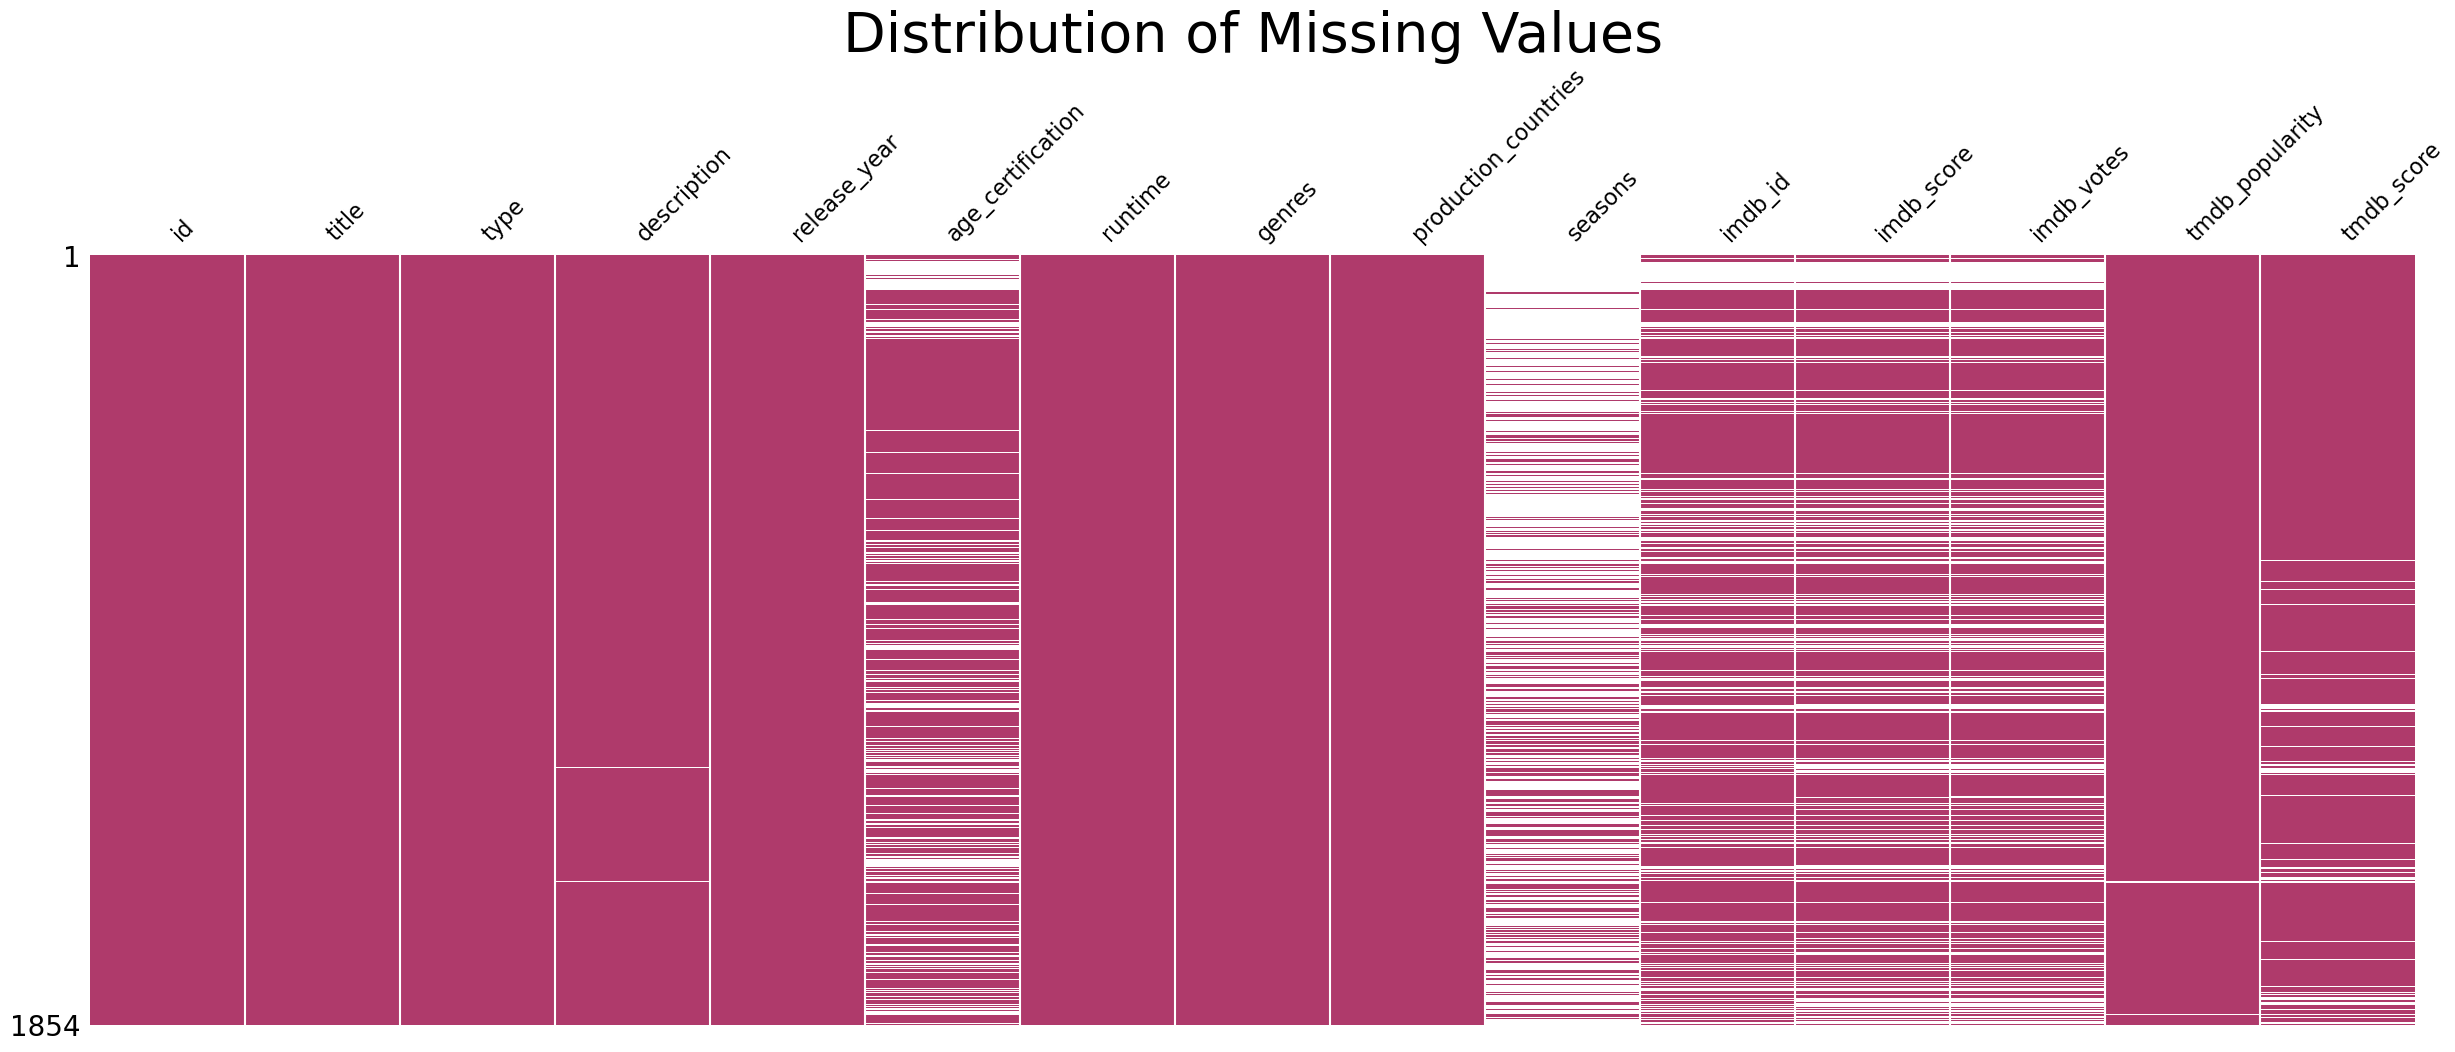

In [7]:
msno.matrix(titles, sparkline=False, figsize=(30,10), color=(0.69,0.23,0.42))
plt.title('Distribution of Missing Values', fontsize=40)

In [8]:
#get theh dtypes non-null also check for missing values
titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1854 entries, 0 to 1853
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1854 non-null   object 
 1   title                 1854 non-null   object 
 2   type                  1854 non-null   object 
 3   description           1845 non-null   object 
 4   release_year          1854 non-null   int64  
 5   age_certification     1403 non-null   object 
 6   runtime               1854 non-null   int64  
 7   genres                1854 non-null   object 
 8   production_countries  1854 non-null   object 
 9   seasons               540 non-null    float64
 10  imdb_id               1376 non-null   object 
 11  imdb_score            1339 non-null   float64
 12  imdb_votes            1328 non-null   float64
 13  tmdb_popularity       1839 non-null   float64
 14  tmdb_score            1708 non-null   float64
dtypes: float64(5), int64(

In [9]:
# For genres
titles['genres'] = titles['genres'].str.replace(r'[','').str.replace(r"'",'').str.replace(r']','')
titles['genre'] = titles['genres'].str.split(',').str[0]

# For countries
titles['production_countries'] = titles['production_countries'].str.replace(r"[", '').str.replace(r"'", '').str.replace(r"]", '')
titles['production_country'] = titles['production_countries'].str.split(',').str[0]

/var/folders/p0/hc2m2hx127v1t4_4g_vrtwp80000gn/T/ipykernel_58759/407068247.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  titles['genres'] = titles['genres'].str.replace(r'[','').str.replace(r"'",'').str.replace(r']','')
/var/folders/p0/hc2m2hx127v1t4_4g_vrtwp80000gn/T/ipykernel_58759/407068247.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  titles['production_countries'] = titles['production_countries'].str.replace(r"[", '').str.replace(r"'", '').str.replace(r"]", '')


In [10]:
titles.drop(['genres', 'production_countries'], axis=1, inplace=True)


In [11]:
titles.head()

,id,title,type,description,release_year,age_certification,runtime,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,genre,production_country
0,tm89464,Miracle on 34th Street,MOVIE,"Kris Kringle, seemingly the embodiment of Sant...",1947,G,96,NaN,tt0039628,7.9,50969.0,23.515,7.388,family,US
1,tm61729,The Adventures of Ichabod and Mr. Toad,MOVIE,The Wind in the Willows: Concise version of Ke...,1950,G,68,NaN,tt0041094,6.9,16502.0,16.194,6.500,horror,US
2,tm61052,Cinderella,MOVIE,Cinderella has faith her dreams of a better li...,1950,G,74,NaN,tt0042332,7.3,164292.0,93.547,7.035,fantasy,US
3,tm87946,Dumbo,MOVIE,Dumbo is a baby elephant born with over-sized ...,1941,G,64,NaN,tt0033563,7.2,135045.0,54.265,6.999,animation,US
4,tm74391,Fantasia,MOVIE,Walt Disney's timeless masterpiece is an extra...,1941,G,119,NaN,tt0032455,7.7,98764.0,43.609,7.382,animation,US


In [12]:
titles['genre'].unique()

array(['family', 'horror', 'fantasy', 'animation', 'comedy', 'thriller',
       'romance', 'action', 'documentation', 'crime', 'western', '',
       'drama', 'scifi', 'history', 'music', 'reality', 'sport', 'war'],
      dtype=object)

In [13]:
titles['production_country'].unique()

array(['US', 'GB', 'CA', '', 'FR', 'SE', 'AU', 'SK', 'ES', 'JP', 'PL',
       'IN', 'CN', 'BR', 'DE', 'NZ', 'AR', 'CI', 'NL', 'AE', 'KR', 'IT',
       'CO', 'ZA', 'CL', 'AT', 'PH', 'BW', 'GR', 'TW', 'MX', 'DK', 'TR',
       'PR'], dtype=object)

In [14]:
titles['genre'] = titles['genre'].replace('', np.nan)
titles['production_country'] = titles['production_country'].replace('',np.nan)

In [15]:
#Handling the 'seasons' column
len(titles.loc[(titles['seasons'].isna()) & (titles['type'] == 'MOVIE')]) == titles.seasons.isna().sum()

True

In [16]:
titles['seasons'].fillna(0, inplace=True)

In [17]:
titles.head()

,id,title,type,description,release_year,age_certification,runtime,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,genre,production_country
0,tm89464,Miracle on 34th Street,MOVIE,"Kris Kringle, seemingly the embodiment of Sant...",1947,G,96,0.0,tt0039628,7.9,50969.0,23.515,7.388,family,US
1,tm61729,The Adventures of Ichabod and Mr. Toad,MOVIE,The Wind in the Willows: Concise version of Ke...,1950,G,68,0.0,tt0041094,6.9,16502.0,16.194,6.500,horror,US
2,tm61052,Cinderella,MOVIE,Cinderella has faith her dreams of a better li...,1950,G,74,0.0,tt0042332,7.3,164292.0,93.547,7.035,fantasy,US
3,tm87946,Dumbo,MOVIE,Dumbo is a baby elephant born with over-sized ...,1941,G,64,0.0,tt0033563,7.2,135045.0,54.265,6.999,animation,US
4,tm74391,Fantasia,MOVIE,Walt Disney's timeless masterpiece is an extra...,1941,G,119,0.0,tt0032455,7.7,98764.0,43.609,7.382,animation,US


In [18]:
#Handling the rest of the null values
titles.isna().sum()

id                      0
title                   0
type                    0
description             9
release_year            0
age_certification     451
runtime                 0
seasons                 0
imdb_id               478
imdb_score            515
imdb_votes            526
tmdb_popularity        15
tmdb_score            146
genre                  39
production_country     52
dtype: int64

In [19]:
titles.drop(['imdb_id','age_certification'], axis=1,inplace=True)

In [20]:
#Let's also get rid of some NaN values that are still left in our dataset.

titles.dropna(inplace=True)
titles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1251 entries, 0 to 1852
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  1251 non-null   object 
 1   title               1251 non-null   object 
 2   type                1251 non-null   object 
 3   description         1251 non-null   object 
 4   release_year        1251 non-null   int64  
 5   runtime             1251 non-null   int64  
 6   seasons             1251 non-null   float64
 7   imdb_score          1251 non-null   float64
 8   imdb_votes          1251 non-null   float64
 9   tmdb_popularity     1251 non-null   float64
 10  tmdb_score          1251 non-null   float64
 11  genre               1251 non-null   object 
 12  production_country  1251 non-null   object 
dtypes: float64(5), int64(2), object(6)
memory usage: 136.8+ KB


In [21]:
#description based Recommender
titles['description'].head()

0    Kris Kringle, seemingly the embodiment of Sant...
1    The Wind in the Willows: Concise version of Ke...
2    Cinderella has faith her dreams of a better li...
3    Dumbo is a baby elephant born with over-sized ...
4    Walt Disney's timeless masterpiece is an extra...
Name: description, dtype: object

In [22]:
#Adding the Streaming Platform for the titles
lt = []
for i in titles['id']:
    movie_streaming = []
   
    if i in disney_titles['id'].values:
        movie_streaming.append('disney+')
    lt.append(movie_streaming)
titles['streaming_platform'] = lt
titles.head()

,id,title,type,description,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,genre,production_country,streaming_platform
0,tm89464,Miracle on 34th Street,MOVIE,"Kris Kringle, seemingly the embodiment of Sant...",1947,96,0.0,7.9,50969.0,23.515,7.388,family,US,[disney+]
1,tm61729,The Adventures of Ichabod and Mr. Toad,MOVIE,The Wind in the Willows: Concise version of Ke...,1950,68,0.0,6.9,16502.0,16.194,6.500,horror,US,[disney+]
2,tm61052,Cinderella,MOVIE,Cinderella has faith her dreams of a better li...,1950,74,0.0,7.3,164292.0,93.547,7.035,fantasy,US,[disney+]
3,tm87946,Dumbo,MOVIE,Dumbo is a baby elephant born with over-sized ...,1941,64,0.0,7.2,135045.0,54.265,6.999,animation,US,[disney+]
4,tm74391,Fantasia,MOVIE,Walt Disney's timeless masterpiece is an extra...,1941,119,0.0,7.7,98764.0,43.609,7.382,animation,US,[disney+]


In [23]:
#Separating the data in Movies and TV Shows
movies = titles[titles['type'] == 'MOVIE'].copy().reset_index()
movies.drop(['index'], axis=1, inplace=True)

shows = titles[titles['type'] == 'SHOW'].copy().reset_index()
shows.drop(['index'], axis=1, inplace=True)
movies.head()

,id,title,type,description,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,genre,production_country,streaming_platform
0,tm89464,Miracle on 34th Street,MOVIE,"Kris Kringle, seemingly the embodiment of Sant...",1947,96,0.0,7.9,50969.0,23.515,7.388,family,US,[disney+]
1,tm61729,The Adventures of Ichabod and Mr. Toad,MOVIE,The Wind in the Willows: Concise version of Ke...,1950,68,0.0,6.9,16502.0,16.194,6.500,horror,US,[disney+]
2,tm61052,Cinderella,MOVIE,Cinderella has faith her dreams of a better li...,1950,74,0.0,7.3,164292.0,93.547,7.035,fantasy,US,[disney+]
3,tm87946,Dumbo,MOVIE,Dumbo is a baby elephant born with over-sized ...,1941,64,0.0,7.2,135045.0,54.265,6.999,animation,US,[disney+]
4,tm74391,Fantasia,MOVIE,Walt Disney's timeless masterpiece is an extra...,1941,119,0.0,7.7,98764.0,43.609,7.382,animation,US,[disney+]


In [24]:
shows.head()

,id,title,type,description,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,genre,production_country,streaming_platform
0,ts30718,Schoolhouse Rock!,SHOW,Schoolhouse Rock! is an American interstitial ...,1973,3,7.0,8.2,4108.0,3.125,7.800,animation,US,[disney+]
1,ts22470,The Muppet Show,SHOW,Go behind the curtains as Kermit the Frog and ...,1976,25,5.0,8.4,25122.0,17.728,8.014,comedy,GB,[disney+]
2,ts20949,Zorro,SHOW,"Diego de la Vega, the son of a wealthy landown...",1957,30,3.0,8.2,3799.0,59.219,7.720,action,US,[disney+]
3,ts24939,Spider-Woman,SHOW,When Jessica Drew was bitten by a poisonous sp...,1979,21,1.0,5.8,873.0,17.427,7.900,animation,US,[disney+]
4,ts27944,Spin and Marty,SHOW,Spin and Marty is a popular series of televisi...,1955,12,1.0,8.1,323.0,2.725,6.000,western,US,[disney+]


In [25]:
#Define a TF-IDF Vectorizer Object. 
#This remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix_movies = tfidf.fit_transform(movies['description'])
tfidf_matrix_shows = tfidf.fit_transform(shows['description'])

#Output the shape of tfidf_matrix
print(f'Shape for Movies: {tfidf_matrix_movies.shape}')
print(f'Shape for Shows: {tfidf_matrix_shows.shape}')

Shape for Movies: (816, 7455)
Shape for Shows: (435, 4987)


In [26]:
 #cosine similarity to calculate a numeric quantity that denotes the similarity between two movies/shows.

# Compute the cosine similarity matrix
cosine_sim_movies = linear_kernel(tfidf_matrix_movies, tfidf_matrix_movies)
cosine_sim_shows = linear_kernel(tfidf_matrix_shows, tfidf_matrix_shows)


#create a way to identify the index of a movie/show in our data, given its title.

indices_movies = pd.Series(movies.index, index=movies['title'])
indices_shows = pd.Series(shows.index, index=shows['title'])

In [27]:
def get_title(title,indices):
    """
    Function that gets the 'index searcher' and searches
    the user's title index.
    """
    
    try:
        index = indices[title]
    except:
        print("\n  Title not found")
        return None

    if isinstance(index, np.int64):
        return index
    
    else:
        rt = 0
        print("Select a title: ")
        for i in range(len(index)):
            print(f"{i} - {movies['title'].iloc[index[i]]}", end=' ')
            print(f"({movies['release_year'].iloc[index[i]]})")
        rt = int(input())
        return index[rt]

In [28]:
# define functions that accept a movie/show title as input and produce a list of the 10 most similar titles.

def get_recommendations_movie(title, cosine_sim=cosine_sim_movies):
    """
    A function that takes a movie title as input and prints on the screen
    the 10 most similar movies based on the input description.
    """    
    
    title = get_title(title, indices_movies)
    if title == None:
        return 
    
    idx = indices_movies[title]
      
    print(f"Title: {movies['title'].iloc[idx]} |  Year: {movies['release_year'].iloc[idx]}")

    print('**' * 40)

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    print(movies[['title', 'release_year','streaming_platform']].iloc[movie_indices])

    print('**' * 40)
def get_recommendations_show(title, cosine_sim=cosine_sim_shows):
    # """
    # A function that takes a show title as input and prints on the screen
    # the 10 most similar shows based on the input description.
    # """
    
    title = get_title(title, indices_shows)
    if title == None:
        return 
    
    idx = indices_shows[title]

    print(f"Title: {shows['title'].iloc[idx]} | Year: {shows['release_year'].iloc[idx]}")

    print('**' * 40)

    # Get the pairwsie similarity scores of all shows with that show
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the shows based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar shows
    sim_scores = sim_scores[1:11]

    # Get the show indices
    show_indices = [i[0] for i in sim_scores]

    print(shows[['title', 'release_year', 'streaming_platform']].iloc[show_indices])

    print('**' * 40)

In [29]:
get_recommendations_movie('Rocky')


  Title not found


In [30]:
get_recommendations_show('Spider-Woman')

Title: Spider-Woman | Year: 1979
********************************************************************************
                                   title  release_year streaming_platform
21                            Spider-Man          1994          [disney+]
231                  Marvel's Spider-Man          2017          [disney+]
12    Spider-Man and His Amazing Friends          1981          [disney+]
15                            Spider-Man          1981          [disney+]
222               Marvel's The Defenders          2017          [disney+]
115         Marvel's Ultimate Spider-Man          2012          [disney+]
171               Marvel's Jessica Jones          2015          [disney+]
253            Marvel Rising: Initiation          2018          [disney+]
62   Spider-Man: The New Animated Series          2003          [disney+]
255         Marvel Super Hero Adventures          2017          [disney+]
************************************************************************